<a href="https://colab.research.google.com/github/iamarpan/NeuralNetwork/blob/master/BackPropagationFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,log_loss,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.colors
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import imageio
from IPython.display import HTML
np.random.seed(0)

In [22]:
data,labels = make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)

In [23]:
mymap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

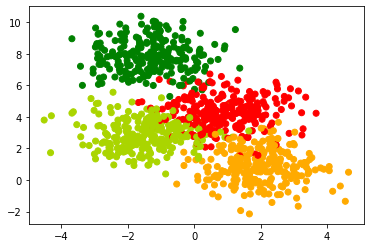

In [24]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=mymap)
plt.show()

In [25]:
orig_labels = labels
labels = np.mod(labels,2)

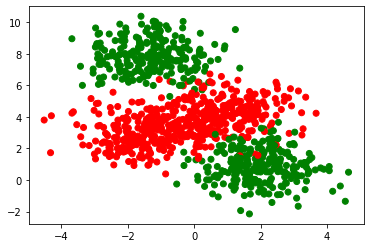

In [26]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=mymap)
plt.show()

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)

In [28]:
class FeedForwardNNW1:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def feed_forward(self,x):
    self.x1,self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self,x,y):
    self.feed_forward(x)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1

  def predict(self,X):
    y_pred = []
    for x in X:
      y_pred.append(self.feed_forward(x))
    return np.array(y_pred)


  def fit(self,X,Y,learning_rate=0.01,epochs=100,display_loss=True):
    if display_loss:
      loss = {}
      w1 = {}
    dw1,dw2,dw3,dw4,dw5,dw6,b1,b2,b3 = [0]*9

    for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
      y_pred = []
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
    
      shape = X.shape[0]
      self.w1 =(self.w1 - learning_rate*dw1)/shape

      if display_loss:
        w1[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.tight_layout()
      plt.subplot(2,1,1)
      plt.plot(list(w1.values()))
      plt.xlabel("epochs")
      plt.ylabel("w1")

         
      plt.subplot(2,1,2)
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      
      plt.show()

   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


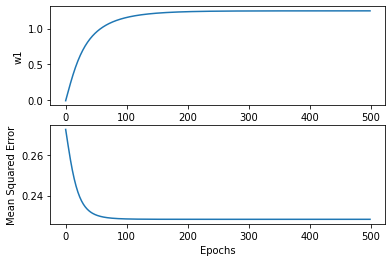

In [29]:
FFNN = FeedForwardNNW1()
FFNN.fit(X_train,Y_train,learning_rate=1,epochs=500)

In [30]:
class FirstFFNetwork:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self,x):
    self.x1, self.x2 = x
    self.a1 = self.x1*self.w1 + self.x2*self.w2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.x1*self.w3 + self.x2*self.w4 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self,x,y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)



  def fit(self,X,Y,learning_rate=0.01,epochs=100,display_loss=True,display_weight=False):
    if display_loss:
      loss = {}      
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
      if display_weight:
        weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


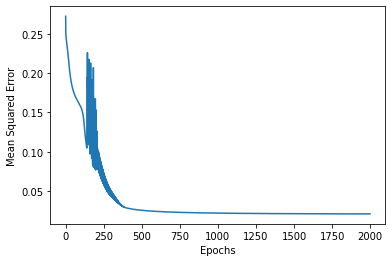

In [31]:
weight_matrices = []
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=5, display_loss=True, display_weight=True)

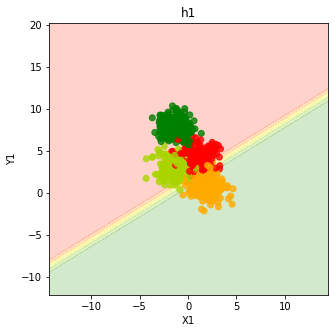

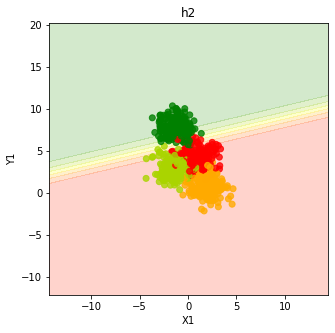

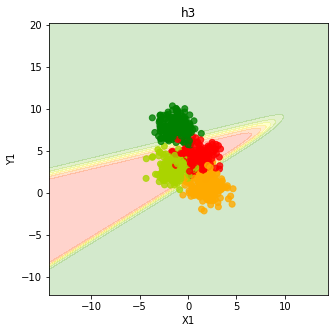

In [69]:
def make_meshgrid(x,y,h=.2):
  x_min,x_max = x.min()-10, x.max() + 10
  y_min,y_max = y.min()-10, y.max() + 10
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
  Z = predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**params)
  return out

def plot_boundary():
  xx,yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_functions = [ffn.predict_h1,ffn.predict_h2,ffn.predict_h3]

  for i in range(3):
    fig,ax = plt.subplots(figsize=(5,5))
    plot_contours(ax,predict_functions[i],xx,yy,cmap=mymap,alpha=0.2)
    ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=mymap,alpha=0.8)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('Y1')
    ax.set_title("h"+str(i+1))

plot_boundary()

In [33]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=mymap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


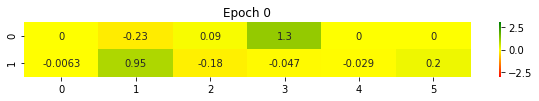

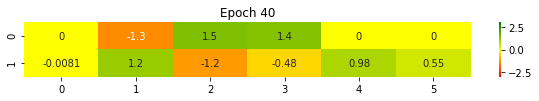

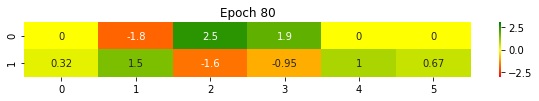

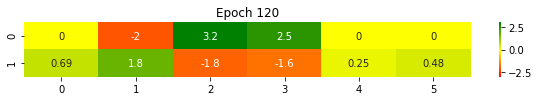

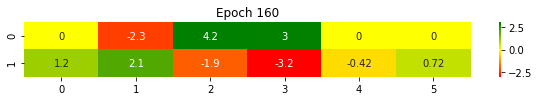

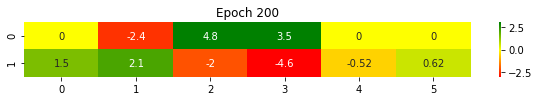

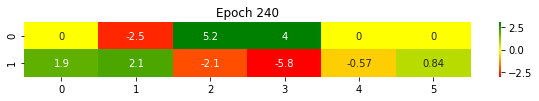

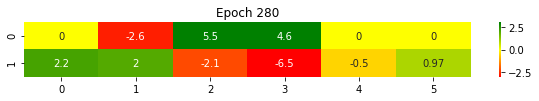

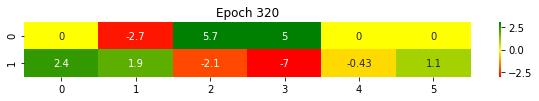

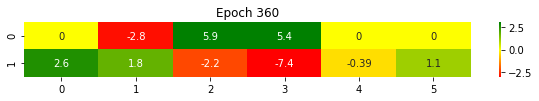

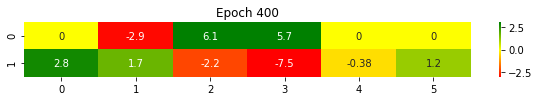

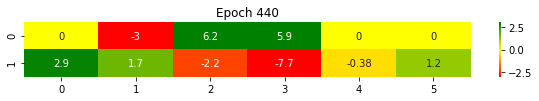

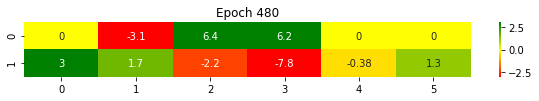

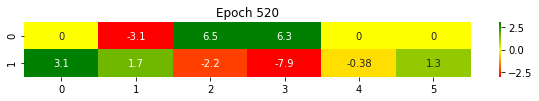

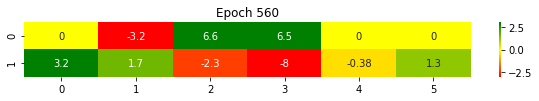

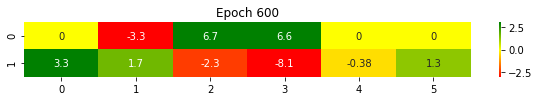

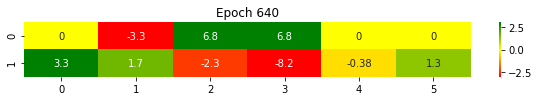

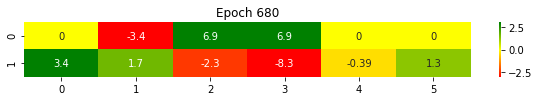

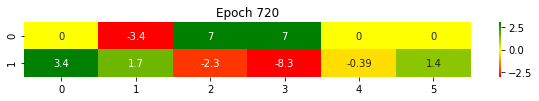

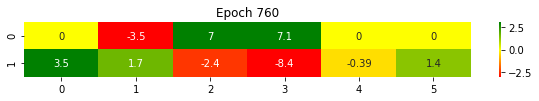

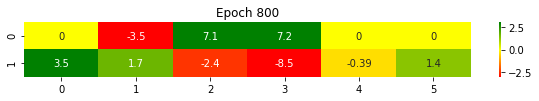

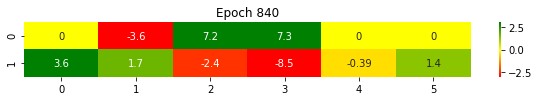

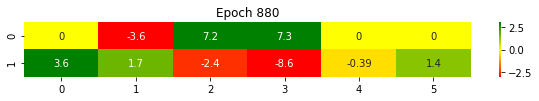

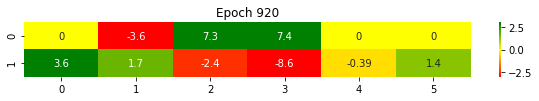

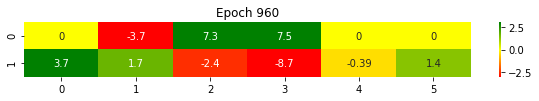

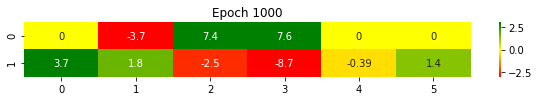

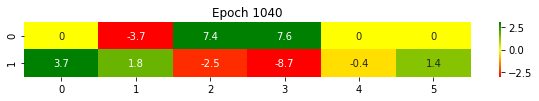

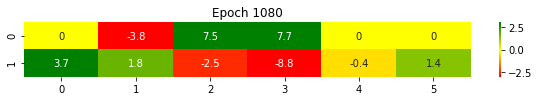

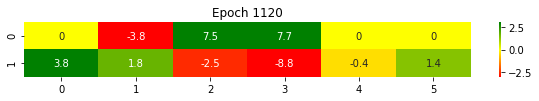

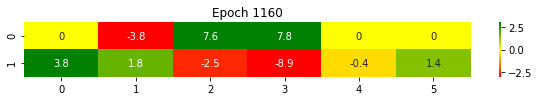

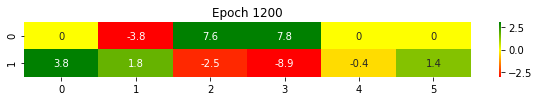

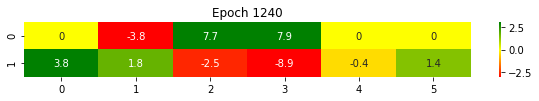

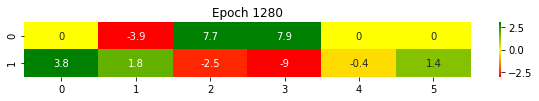

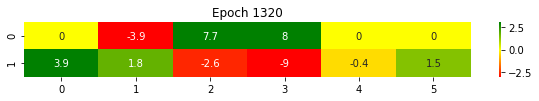

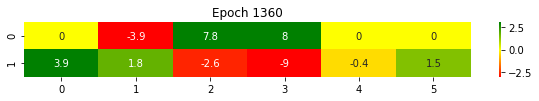

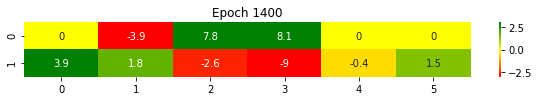

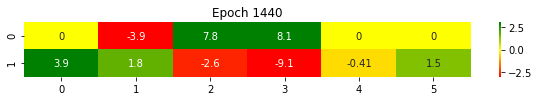

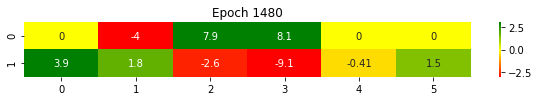

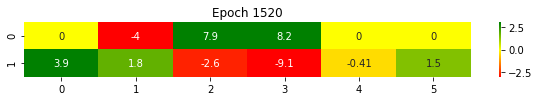

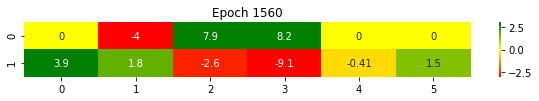

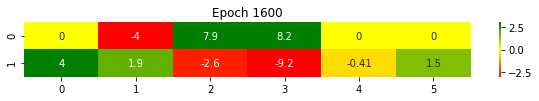

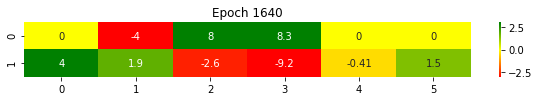

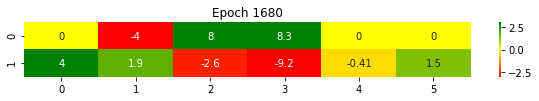

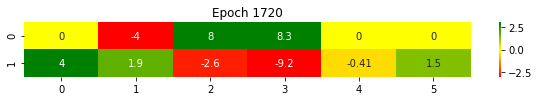

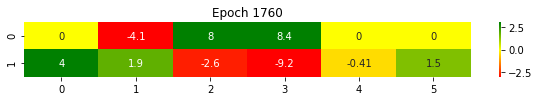

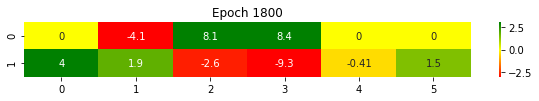

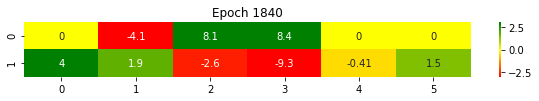

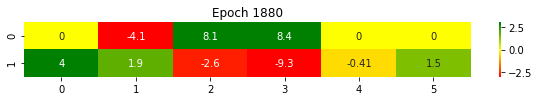

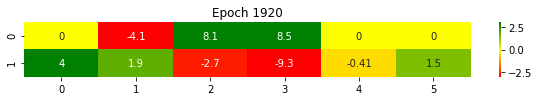

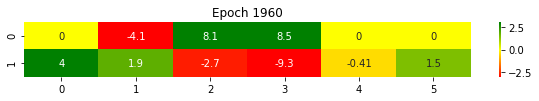

In [34]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)

In [35]:
X_train_pred = ffn.predict(X_train)
X_train_pred_binarised = (X_train_pred>=0.5).astype("int").ravel()
X_val_pred = ffn.predict(X_test)
X_val_pred_binarised = (X_val_pred>=0.5).astype("int").ravel()
print("Train accuracy is {}".format(accuracy_score(Y_train,X_train_pred_binarised)))
print("Validation accuracy is {}".format(accuracy_score(X_val_pred_binarised,Y_test)))

Train accuracy is 0.976
Validation accuracy is 0.94


Multi Class Classification

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(data,orig_labels,stratify=orig_labels,random_state=0)

(750, 2)

In [37]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_test = enc.fit_transform(np.expand_dims(Y_test,1)).toarray()
print(y_OH_train.shape,y_OH_test.shape)


(750, 4) (250, 4)


In [72]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def grad_short(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db3 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db3 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db3 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
  
  
  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h6(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:125: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


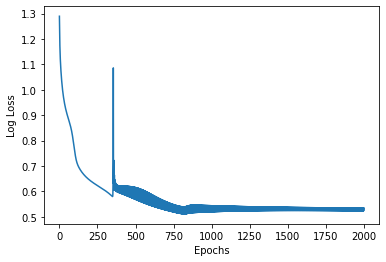

2000


In [73]:
weight_matrices = []
ffmcn = FFSN_MultiClass_Specific()
ffmcn.fit(X_train,y_OH_train,epochs=2000,learning_rate=1,display_loss=True,display_weight=True)
print(len(weight_matrices))

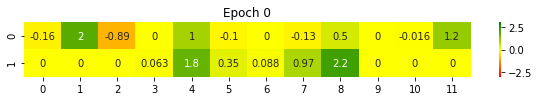

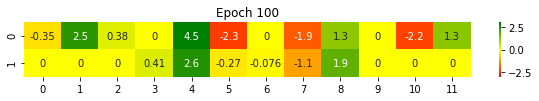

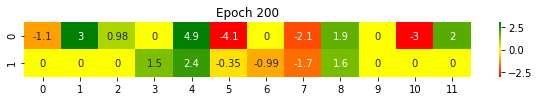

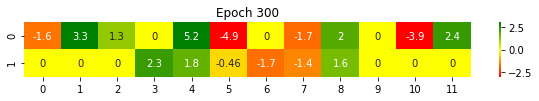

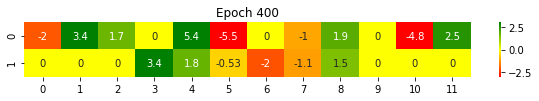

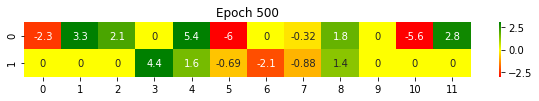

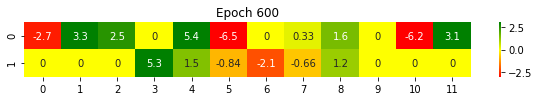

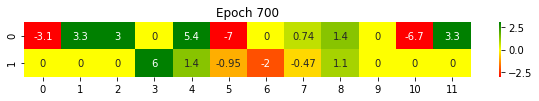

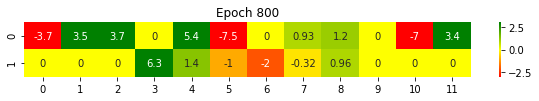

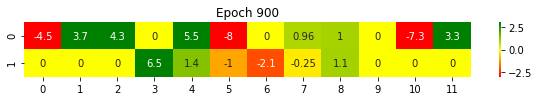

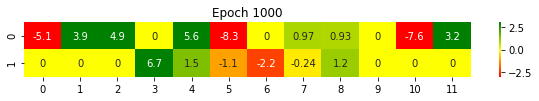

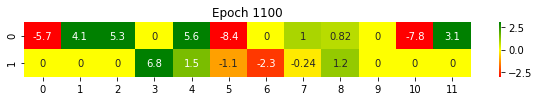

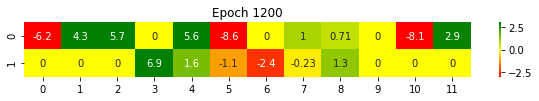

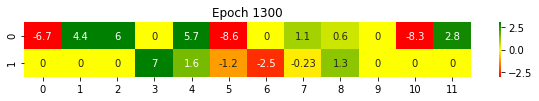

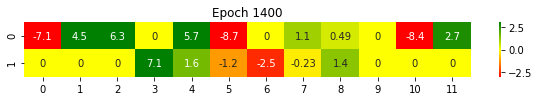

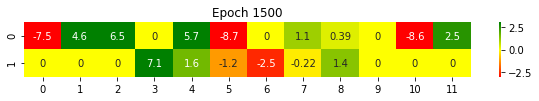

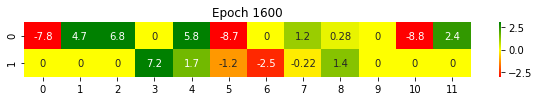

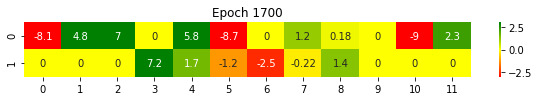

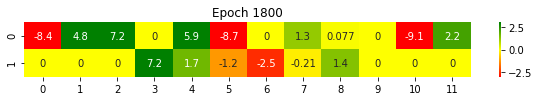

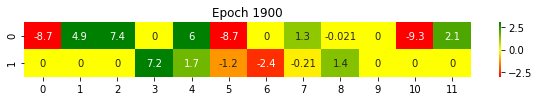

In [74]:
imageio.mimsave('./weights_viz_multi_class.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//20)], fps=1)

In [77]:
Y_pred_train = ffmcn.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)
Y_pred_val = ffmcn.predict(X_test)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.79
Validation accuracy 0.8


True

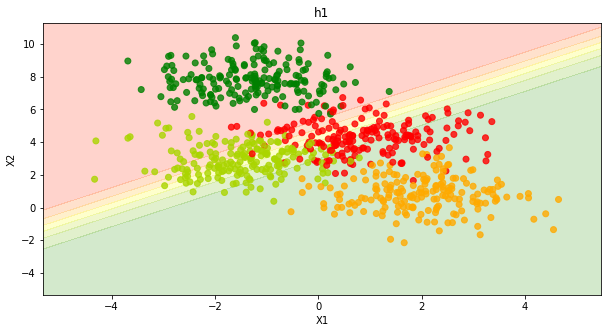

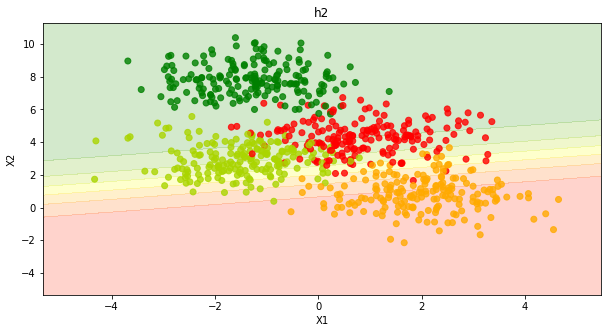

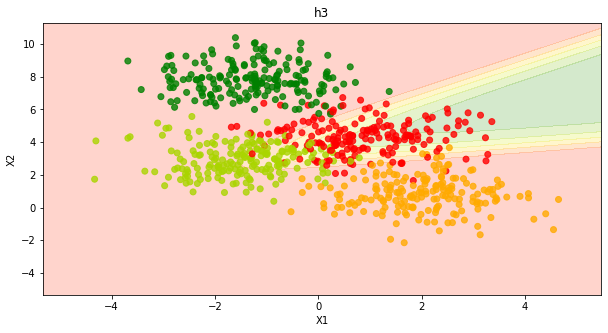

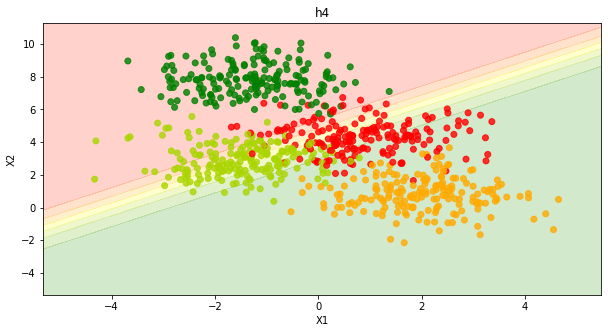

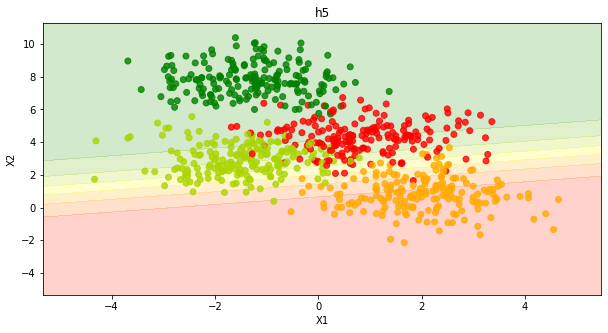

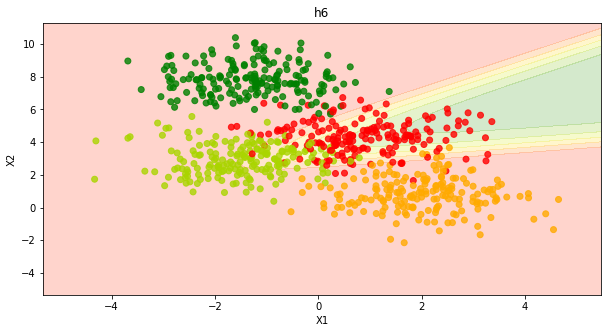

In [79]:
def make_meshgrid(x,y,h=.2):
  x_max,x_min = x.max() + 1, x.min() - 1
  y_max,y_min = y.max() + 1, x.min() - 1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
  Z = predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

def plot_boundary():
  xx,yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_functions = [ffmcn.predict_h1,ffmcn.predict_h2,ffmcn.predict_h3,ffmcn.predict_h4,ffmcn.predict_h5,ffmcn.predict_h6]

  for i in range(6):
    fig,ax = plt.subplots(figsize=(10,5))
    plot_contours(ax,predict_functions[i],xx,yy,cmap=mymap,alpha=0.2)
    ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=mymap, alpha=0.8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title("h"+str(i+1))
      
  return True
plot_boundary()